# Data Preparation and Analysis

## Part 1: Data Preperations

In [1]:
# import necessary libraries for data cleaning.
import pandas as pd
import numpy as np
from datetime import datetime

### 1.1 Data Loading
Lets now load in the data from the saved .csv files and store each years data in a seperate dataframe.

In [2]:
# File path to 2021 sales data csv
file_path_2021 = "data/2021_property_sales_data.csv"
# Load the 2021 sales data into its own dataframe
df_2021 = pd.read_csv(file_path_2021)
# Drop the unused "Unnamed: 0" column
df_2021 = df_2021.drop(columns = "Unnamed: 0")

In [3]:
# File path to 2022 sales data csv
file_path_2022 = "data/2022_property_sales_data.csv"
# Load the 2022 sales data into its own dataframe
df_2022 = pd.read_csv(file_path_2022)
# Drop the unused "Unnamed: 0" column
df_2022 = df_2022.drop(columns = "Unnamed: 0")

In [4]:
# File path to 2023 sales data csv
file_path_2023 = "data/2023_property_sales_data.csv"
# Load the 2023 sales data into its own dataframe
df_2023 = pd.read_csv(file_path_2023)
# Drop the unused "Unnamed: 0" column
df_2023 = df_2023.drop(columns = "Unnamed: 0")

In [5]:
# File path to 2024 sales data csv
file_path_2024 = "data/2024_property_sales_data.csv"
# Load the 2024 sales data into its own dataframe
df_2024 = pd.read_csv(file_path_2024)
# Drop the unused "Unnamed: 0" column
df_2024 = df_2024.drop(columns = "Unnamed: 0")

### 1.2 Data Format
Lets now check if the values are of the same format by using frequency tables.

#### Sale Date
Lets convert the string formats dates -> datetime objects of the following format yyyy-mm-dd.

E.g,. 15 January 2021 -> 2021-01-15

In [6]:
## Helper function to parse date of format "15 January 2021" into 2021-01-15
def convert_date(date_str):
    try:
        # Date already in yyyy-mm-dd format.
        return datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        pass
    try:
        return datetime.strptime(date_str, "%d %B %Y")
    except ValueError:
        return None

Lets clean the date values to be of the format "yyyy-mm-dd"

In [7]:
# Stripping "sold" from the beggining of each entry in the "Sale Date" column.
df_2021["Sale Date"] = df_2021["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
df_2022["Sale Date"] = df_2022["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
df_2023["Sale Date"] = df_2023["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
df_2024["Sale Date"] = df_2024["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
print("All values have been stripped of the prefix sold")

All values have been stripped of the prefix sold


Something here...

In [8]:
df_2021["Sale Date"] = pd.to_datetime(df_2021["Sale Date"].apply(convert_date))
df_2022["Sale Date"] = pd.to_datetime(df_2022["Sale Date"].apply(convert_date))
df_2023["Sale Date"] = pd.to_datetime(df_2023["Sale Date"].apply(convert_date))
df_2024["Sale Date"] = pd.to_datetime(df_2024["Sale Date"].apply(convert_date))
print("All values have now been converted to the format yyyy-mm-dd ")

All values have now been converted to the format yyyy-mm-dd 


#### Sale Price
This data is formatted in the following formats:
 - €709,606.00
 - € 553,235

Lets process this data so if the input was "€500,000.00" the output would be 500000.0

In [9]:
# Helper function to remove currenct sign and format the values as a 
# string with format double rounded to 2 decimal places.

def clean_sale_prices(value):
    # Remove the currency sign
    value = str(value).replace("€", "").replace(",", "").strip()

    try:
        # Try to convert the string to a float and round to 2 decimal places
        return round(float(value), 2)
    except ValueError:
        return None

Apply the helper function to all entries in the column.

In [10]:

df_2021["Sale Price"] = df_2021["Sale Price"].apply(clean_sale_prices)
df_2022["Sale Price"] = df_2022["Sale Price"].apply(clean_sale_prices)
df_2023["Sale Price"] = df_2023["Sale Price"].apply(clean_sale_prices)
df_2024["Sale Price"] = df_2024["Sale Price"].apply(clean_sale_prices)

Lets double check the output of our new column.

#### Location
All entries are of a valid string format, thus no pre-processing steps need to be applied to these columns.

#### Year Built
This data is currently stored in the following formats:
 - Unknown
 - c1999 (Where there is a prefixed char)
 - 1999c (Where there is a suffix char)

Lets process these entries for each dataframe so each entry is a valid year.

Properties with unknown years will be filled in with the median year amoung all other entries.

In [11]:
# Extract the first 4 digits from anywhere in the string, and add back into the column.
df_2021["Year Built"] = df_2021["Year Built"].str.extract(r"(\d{4})")
df_2022["Year Built"] = df_2022["Year Built"].str.extract(r"(\d{4})")
df_2023["Year Built"] = df_2023["Year Built"].str.extract(r"(\d{4})")
df_2024["Year Built"] = df_2024["Year Built"].str.extract(r"(\d{4})")

In [12]:
# Convert the extracted year values to numeric (integers)
df_2021["Year Built"] = pd.to_numeric(df_2021["Year Built"], errors="coerce")
df_2022["Year Built"] = pd.to_numeric(df_2022["Year Built"], errors="coerce")
df_2023["Year Built"] = pd.to_numeric(df_2023["Year Built"], errors="coerce")
df_2024["Year Built"] = pd.to_numeric(df_2024["Year Built"], errors="coerce")

In [13]:
# Fill in empty values with the median value for each year.
median_2021 = round(df_2021["Year Built"].median())
df_2021["Year Built"] = df_2021["Year Built"].fillna(median_2021).astype(int)

median_2022 = round(df_2022["Year Built"].median())
df_2022["Year Built"] = df_2022["Year Built"].fillna(median_2022).astype(int)

median_2023 = round(df_2023["Year Built"].median())
df_2023["Year Built"] = df_2023["Year Built"].fillna(median_2023).astype(int)

median_2024 = round(df_2024["Year Built"].median())
df_2024["Year Built"] = df_2024["Year Built"].fillna(median_2024).astype(int)

In [14]:
df_2021["Year Built"] = df_2021["Year Built"].astype("Int64")
df_2022["Year Built"] = df_2022["Year Built"].astype("Int64")
df_2023["Year Built"] = df_2023["Year Built"].astype("Int64")
df_2024["Year Built"] = df_2024["Year Built"].astype("Int64")

#### Garden
Entries in the Garden column are of the following formats:
 - Yes
 - No
 - ???
   
Lets perform some processing to map the "???" entries to "Unknown"

In [15]:
# Dictionary to map "???" entry to "Unknown"
map1 = {"???":"Unknown"}

In [16]:
# For each entry in the "Garden" column in the 4 dataframes "???" entries are replaced with "Unknown"
df_2021["Garden"] = df_2021["Garden"].replace(map1)
df_2022["Garden"] = df_2022["Garden"].replace(map1)
df_2023["Garden"] = df_2023["Garden"].replace(map1)
df_2024["Garden"] = df_2024["Garden"].replace(map1)

#### Garage
Entries in the Garage column are of the following formats:
 - Yes
 - No
 - ???
   
Lets perform some processing to map the "???" entries to "Unknown"

In [17]:
# Since the entries are of the same  values as the "Garden" column we can use the same maping dictionary as
# before for the four dataframes.
df_2021["Garage"] = df_2021["Garage"].replace(map1)
df_2022["Garage"] = df_2022["Garage"].replace(map1)
df_2023["Garage"] = df_2023["Garage"].replace(map1)
df_2024["Garage"] = df_2024["Garage"].replace(map1)

#### Type
Entries in the Type column are of the following formats:
 - Detached
 - Bungalow
 - Semi-Detached
 - Duplex
 - End-of-Terrace
 - Terraced
 - Semi-D
 - Det.
   
As you can see "Semi-Detached" and "Semi-D" should be counted together. The Same logic is applied to "Detached" and "Det.". 

Lets now use a mapping dictionary to use a universal entry format for Semi-Detached and Detached houses.

In [18]:
# Define a mapping dictionary to universally format entries for detached and semi-detached houses.
house_type_map = {"Det.":"Detached", "Semi-D":"Semi-Detached"}

In [19]:
# Strip and whitespace from the entries across the 4 dataframes.
df_2021["Type"] = df_2021["Type"].str.strip()
df_2022["Type"] = df_2022["Type"].str.strip()
df_2023["Type"] = df_2023["Type"].str.strip()
df_2024["Type"] = df_2024["Type"].str.strip()

In [20]:
# Apply the mapping dictionary to universally format the incorrect entries.
df_2021["Type"] = df_2021["Type"].replace(house_type_map)
df_2022["Type"] = df_2022["Type"].replace(house_type_map)
df_2023["Type"] = df_2023["Type"].replace(house_type_map)
df_2024["Type"] = df_2024["Type"].replace(house_type_map)

#### Stories
Entries in the Type column are of the following formats:
 - 1 Storey
 - 1.5 Storey
 - 2 Storey

Lets remove the text and convert to a numeric value.

In [21]:
# Remove the -Storey prefix
df_2021["Stories"] = df_2021["Stories"].str.replace("-Storey", "").str.strip()
df_2022["Stories"] = df_2022["Stories"].str.replace("-Storey", "").str.strip()
df_2023["Stories"] = df_2023["Stories"].str.replace("-Storey", "").str.strip()
df_2024["Stories"] = df_2024["Stories"].str.replace("-Storey", "").str.strip()

In [22]:
# Convert all entries to a numeric value.
df_2021["Stories"] = pd.to_numeric(df_2021["Stories"],errors="coerce")
df_2022["Stories"] = pd.to_numeric(df_2022["Stories"],errors="coerce")
df_2023["Stories"] = pd.to_numeric(df_2023["Stories"],errors="coerce")
df_2024["Stories"] = pd.to_numeric(df_2024["Stories"],errors="coerce")

#### Bedrooms

Entries in this columns are strings.

Lets convert them to numeric values.

In [23]:
df_2021["Bedrooms"] = pd.to_numeric(df_2021["Bedrooms"],errors="coerce")
df_2022["Bedrooms"] = pd.to_numeric(df_2022["Bedrooms"],errors="coerce")
df_2023["Bedrooms"] = pd.to_numeric(df_2023["Bedrooms"],errors="coerce")
df_2024["Bedrooms"] = pd.to_numeric(df_2024["Bedrooms"],errors="coerce")

#### Bathrooms

Entries in this columns are strings.

Lets convert them to numeric values.

In [24]:
df_2021["Bathrooms"] = pd.to_numeric(df_2021["Bathrooms"],errors="coerce")
df_2022["Bathrooms"] = pd.to_numeric(df_2022["Bathrooms"],errors="coerce")
df_2023["Bathrooms"] = pd.to_numeric(df_2023["Bathrooms"],errors="coerce")
df_2024["Bathrooms"] = pd.to_numeric(df_2024["Bathrooms"],errors="coerce")

#### First Time Buyer
Entries in the First Time Buyer columns are of the following formats:
 - Yes
 - No
 - NO
 - YES

Lets now convert all entries to lowercase to create a universal entry format.

In [25]:
# Use the .str.lower() function to convert all characters to lowercase
# Then use the str.strip() function to remove all prefix and suffix whitespace.
df_2021["First Time Buyer"] = df_2021["First Time Buyer"].str.lower().str.strip()
df_2022["First Time Buyer"] = df_2022["First Time Buyer"].str.lower().str.strip()
df_2023["First Time Buyer"] = df_2023["First Time Buyer"].str.lower().str.strip()
df_2024["First Time Buyer"] = df_2024["First Time Buyer"].str.lower().str.strip()

## Part 2: Property Sales - Multi Year Analysis (2021-2024)

Lets now use the 4 cleaned ABTs containing property sales data from 2021-2024.

This allows us to observe:
- cross-sectional differences (location, type, features)
- temporal changes in the housing market over time

In [26]:
# Import data vis librarys
import matplotlib
import matplotlib.pyplot as plt

### 1) Combine ABTs
Lets make a master dataframe composed of the sales data over the four years.

Lets also add a "Year" column for ease of access. The "Year" column will store the year the property was sold.

In [27]:
master_df = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)
master_df["Year"] = master_df["Sale Date"].dt.year

### 2) Dataset Overview 

In [28]:
master_df.info()
#master_df.describe(numeric_only=True)
master_df["Year"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale Date         1450 non-null   datetime64[ns]
 1   Sale Price        1450 non-null   float64       
 2   Location          1450 non-null   object        
 3   Year Built        1450 non-null   Int64         
 4   Garden            1450 non-null   object        
 5   Garage            1450 non-null   object        
 6   Type              1450 non-null   object        
 7   Stories           1450 non-null   float64       
 8   Bedrooms          1450 non-null   int64         
 9   Bathrooms         1450 non-null   int64         
 10  First Time Buyer  1450 non-null   object        
 11  Year              1450 non-null   int32         
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 131.8+ KB


Year
2024    459
2023    355
2021    323
2022    313
Name: count, dtype: int64

###  3) Sale Price Trends Across Years

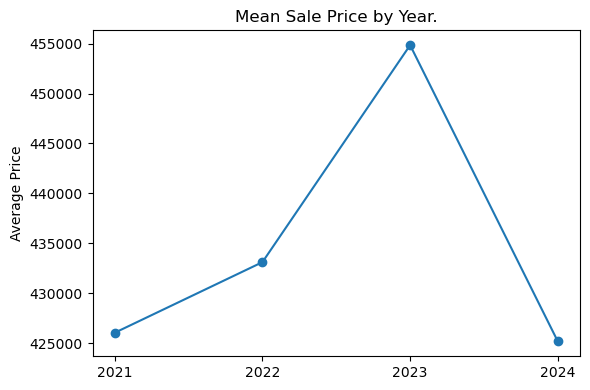

In [29]:
yearly_average = master_df.groupby("Year")["Sale Price"].mean()
plt.figure(figsize=(6,4))
plt.plot(yearly_average.index.astype(str), yearly_average.values, marker="o")
plt.xticks(rotation=0)
plt.title("Mean Sale Price by Year.")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

#### Observation

These results tell us that the mean Sale Price of the properties in the dataset fluctuate between just above "€425,000" and just below "€455,000", with 2024 having the lowest mean Sale Price and 2023 having the largest.

### 4) Location Price Trends Over Time

Lets analyse the dataset to discover price trends of different locations from 2021 - 2024.

<Figure size 1500x1000 with 0 Axes>

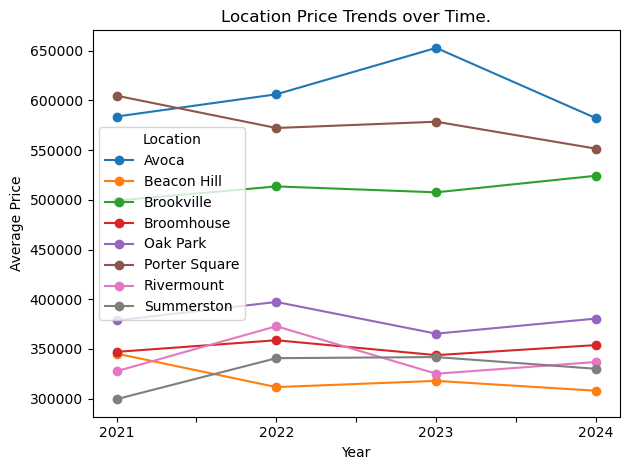

In [30]:
plt.figure(figsize=(15,10))

# Group and shape
location_price_over_time = master_df.groupby(["Year", "Location"])["Sale Price"].mean().unstack()

# Convert the numeric year values to string to add as the x-axis labels
location_price_over_time.index = location_price_over_time.index.astype(str)

# Plot the graph
location_price_over_time.plot(marker="o")
plt.title("Location Price Trends over Time.")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

####  Observation

No Locations are suffering from a noticable drop in market value over time, however Avoca experienced an increase in mean Sale Price from just below €600,000 in 2021 to almost €650,000 just two years later in 2023.

Furthermore, a clear seperation in market values between locations are visable here with:
 - Avoca and Porter Square typically falling in the €575,000 to €650,000 price range. 
 - Brookville falling in the €500,000 age range.
 - Summerston, Rivermount, Beacon Hill, Broomhouse, and Oak Park falling in the €300,000 to €375,000 range. 

### 5) Mean Sale price per Location.

Lets now analyse the data to see how location effects the price of properties.

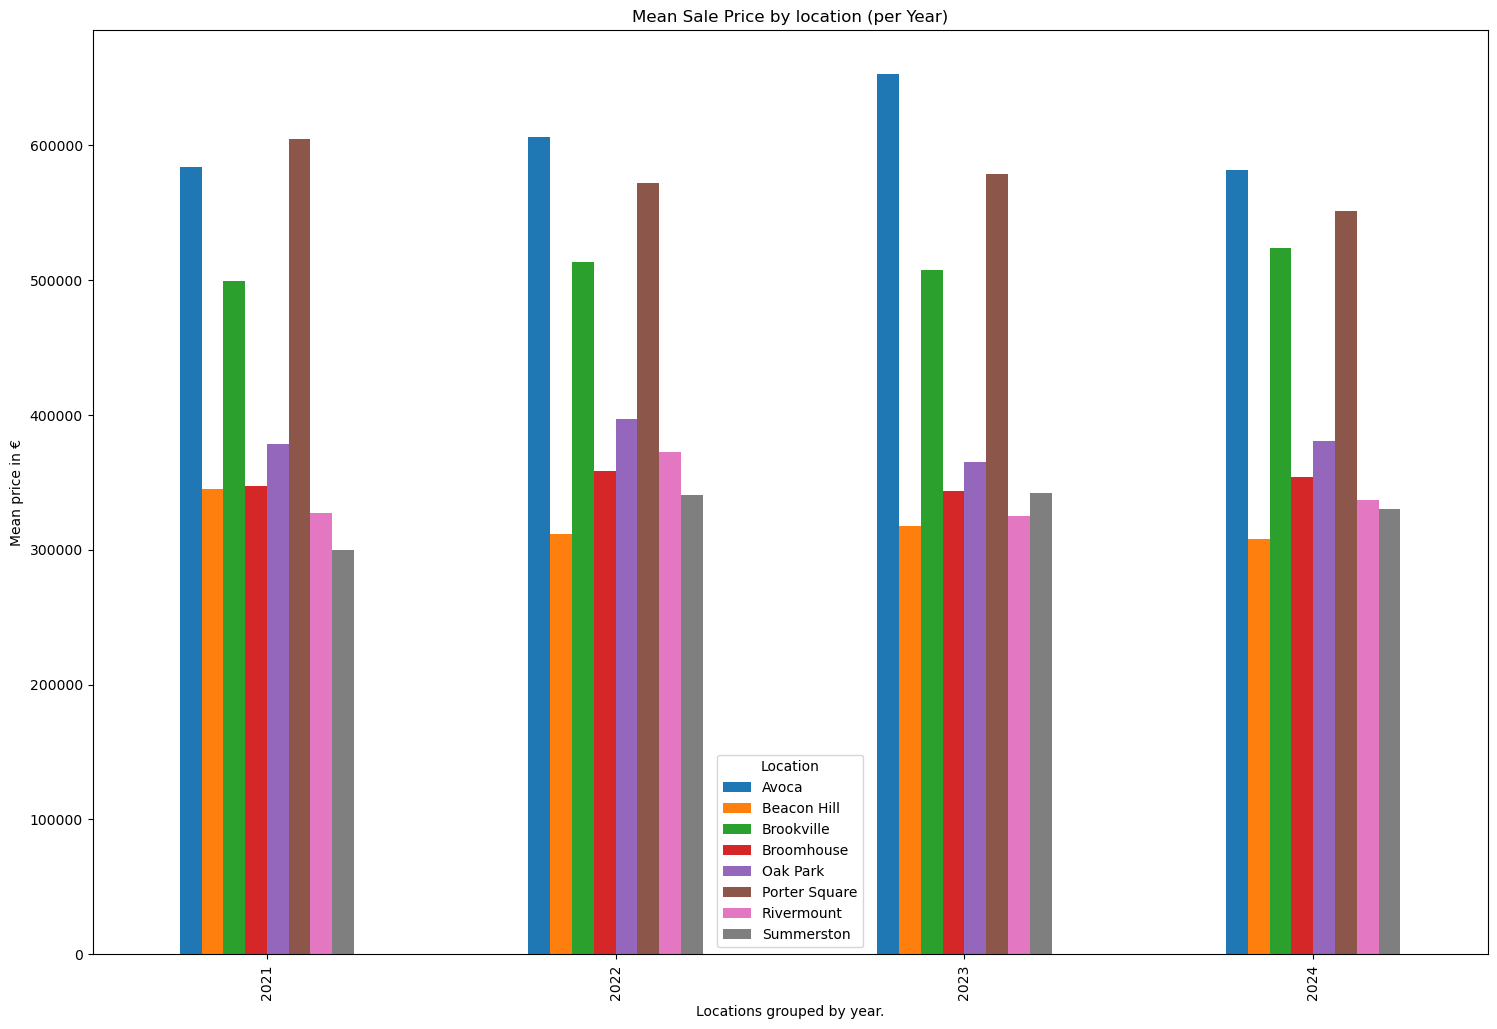

In [31]:
master_df.groupby(["Year", "Location"])["Sale Price"].mean().unstack().plot(kind="bar", figsize=(18,12))
plt.ylabel("Mean price in €")
plt.xlabel("Locations grouped by year.")
plt.title(f"Mean Sale Price by location (per Year)")
plt.show()

#### Observation 

This chart showing the Mean Sale Price per location reinforces the observations made previously.

### 6) Property Type Market shift

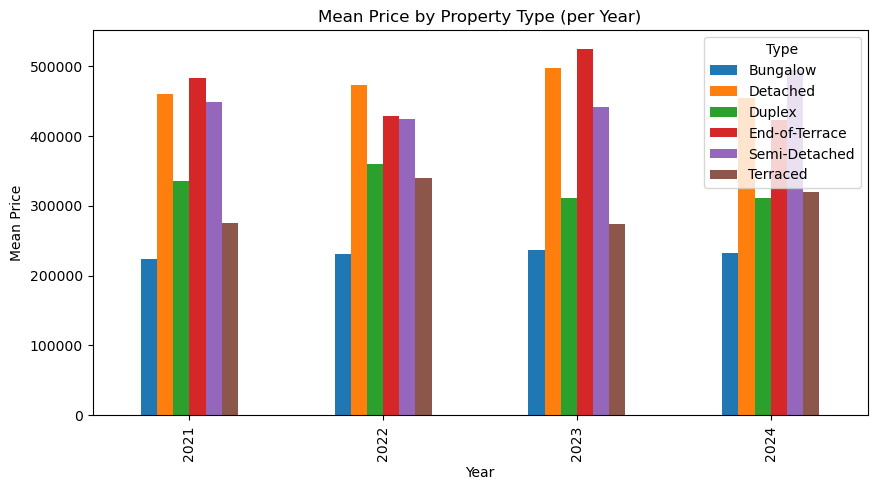

In [32]:
master_df.groupby(["Year", "Type"])["Sale Price"].mean().unstack().plot(kind="bar", figsize=(10,5))
plt.title("Mean Price by Property Type (per Year)")
plt.ylabel("Mean Price")
plt.show()

#### Observation

This graph shows the average price per property type, grouped by year.

Trends stay constant throughout the years with the following characteristics:
 - Bungalows being the cheapest property type and costing roughly €225,000
 - Terraced houses are the second cheapest property types with the exception of 2024 where they are slightly more expensive than duplex properties. Terraced houses range from €250,000 to €325,000.
 - Duplex properties are the third cheapest property types (with the exception of 2024 as mentioned above), and range from €275,000 to €350,000
 - Semi-Detached properties are the 4th cheapest with the exception of 2024 where they are actually the most expensive (this will be investigated in subsection 5.2) and typically range from 425,000 to 450,000. 
 - Detached and End-Of_Terrace fluctuate between most and second most expensive property type, with 2024 being an exception. These two property types have a price range of €425,000 and €500,000

#### 6.2) Semi-detached Price outlier in 2024

Semi-Detached properties were the most expensive of the property types in 2024. This seems slightly unusual since the previous 3 years placed them as the 3rd most expensive of the property types in the dataset. 

Lets now explore this outlier result to try and understand what might be causing it.

My intuition into why this might be the case is that the location of the semi-detached houses sold in 2024 are in the more expensive areas. Lets now see if this is the case.

Text(0.5, 1.0, 'Number of property types sold per location, type and year')

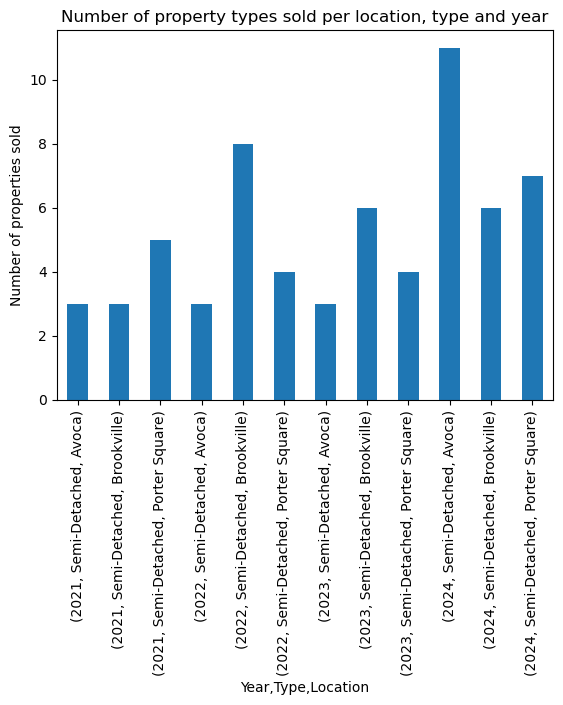

In [33]:
expensive_area_set = {"Avoca","Brookville","Porter Square"}
semi_detached_properties_in_expensive_areas = master_df[(master_df["Type"] == "Semi-Detached") & (master_df["Location"].isin(expensive_area_set))]
property_type_per_location = semi_detached_properties_in_expensive_areas.groupby(["Year","Type","Location"]).size()
property_type_per_location.plot(kind="bar")
plt.ylabel("Number of properties sold")
plt.title("Number of property types sold per location, type and year")

#### Observation

From the Graph the following: x-axis = (2021, Semi-Detached, Avoca), y-axis = 3, reads as "3 Semi-Detached properties were sold in the Avoca area in 2021."

This will give us an insight into the amount of Semi-Setached property sales in expensive areas per year.

The results of this graph are as follows:
 - In 2021 11 Semi-Detached properties were sold in expensive areas.
 - In 2022 15 Semi-Detached properties were sold in expensive areas.
 - In 2023 13 Semi-Detached properties were sold in expensive areas.
 - In 2024 24 Semi-Detached properties were sold in expensive areas.

As you can see in 2024 there are 9 more Semi-Detached properties sold then the next closest year 2022. All other years grouped into the (11 - 15) range. This shows why the outlier data for Semi-Detached prices in 2024 is caused. 

### 7) Number of Sales Per Month

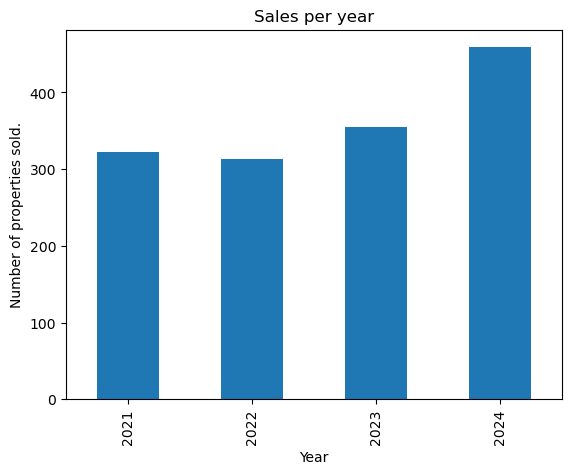

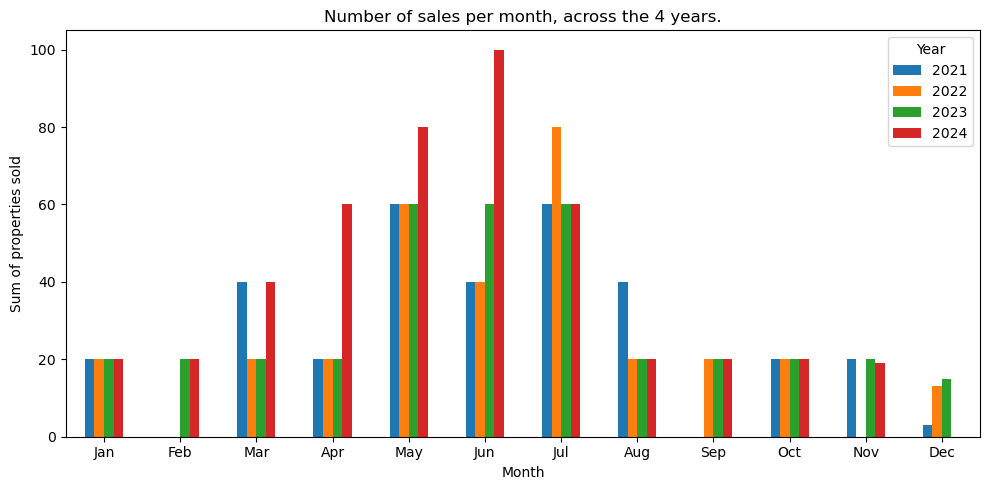

In [34]:
sales_per_year = master_df.groupby("Year").size()
sales_per_year.plot(kind="bar")
plt.title("Sales per year")
plt.ylabel("Number of properties sold.")
plt.show()


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
master_df["Month"] = master_df["Sale Date"].dt.month

Sales_perMonth = master_df.groupby(["Month", "Year"]).size().unstack()
Sales_perMonth.plot(kind="bar", figsize=(10,5))
plt.xticks(ticks=range(12), labels=months, rotation=0)
plt.title("Number of sales per month, across the 4 years.")
plt.ylabel("Sum of properties sold")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

#### Observation

There is a clear trend here, property sales remain quiet for the non summer months with a huge spike in the number of sales in May, June, and July.

Furthermore, 2024 saw a large rise (+100) in the number of sales compared to the three previous years.

### 8) Do Property Features have a relationship with price?

Lets explore whether the features Bedrooms, Bathrooms, and Garden have any relation to the Sale Price of the Property

#### 7.1) Bedrooms 

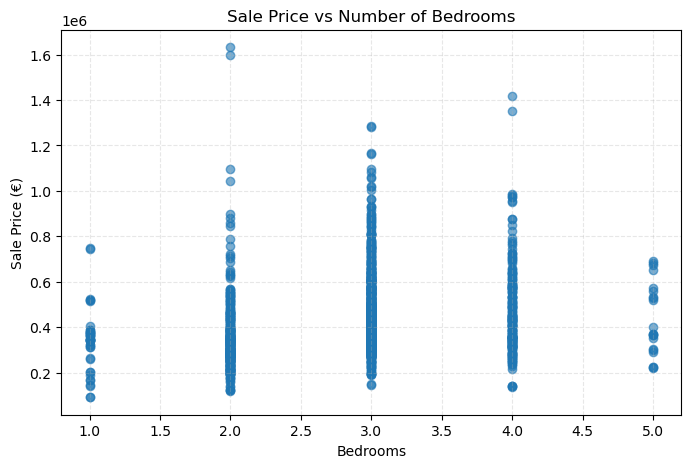

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(master_df["Bedrooms"], master_df["Sale Price"], alpha=0.6)
plt.title("Sale Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Sale Price (€)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


#### Observation

Although you might think there would be a positive relationship between number of bedrooms and price, that doesn't seem to be the case here. Other features such as location, first Time Owner, or Type might have  more effect on the Sale Price than the number of bedrooms.

#### 7.2) Bathrooms

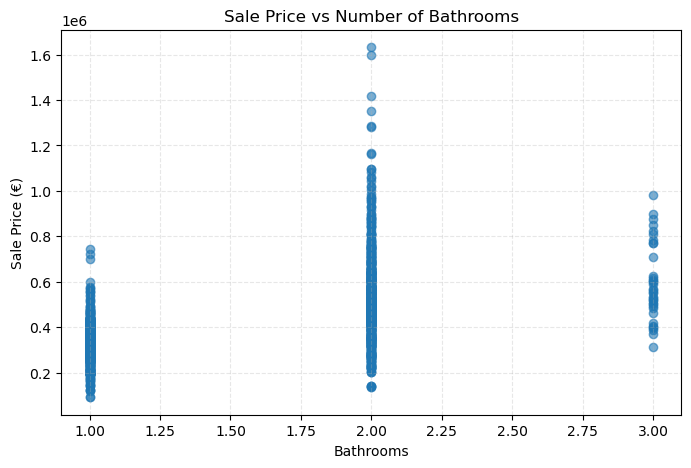

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(master_df["Bathrooms"], master_df["Sale Price"], alpha=0.6)
plt.title("Sale Price vs Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Sale Price (€)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

#### Observation

This scatterplot shows a clearer relationship between number of bathrooms and Sale Price compared to the bedrooms scatterplot. One bathroom properties tend to be the cheapest of the three property types, while 2 bathroom properties span a broader range and contain the most expensive properties. Three bathroom properties also tend to sell at higher prices, but the smaller sample size introduces uncertainty. This suggests that number of bathrooms is a useful predictor of price as it could reflect more general property characteristics (e.g more bathroom -> larger property -> more expenisive area...).

#### 7.3) Garden

Lets do something different here.

Remember from our our data cleaning section, some entries in the column are "Unknown" in this section lets try to predict whether a property with "Unknown" has or doesn't have a garden based on known features.

##### Splitting

Lets first split the data into two data frames: Known and Unknown Garden Entries.

In [37]:
df_garden_known = master_df[master_df["Garden"] != "Unknown"]
df_garden_unknown = master_df[master_df["Garden"] == "Unknown"]

##### Feature Selection + Preprocessing

Lets first import all the nenecessary sklearn librarys to pre-process, analyse and evaluate our model.

In [38]:
# The sklearn library to convert categorical data -> binary dummy features.
from sklearn.preprocessing import OneHotEncoder
# Data transformation library for preprocessing.
from sklearn.compose import ColumnTransformer
# Pipeline library.
from sklearn.pipeline import Pipeline
# Model library.
from sklearn.ensemble import RandomForestClassifier
# Method to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Evaluation metrics librarys.
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Lets define the features we want to use in our model to try and predict the presence or non presence of Garden. Lets also explicity let the model know what we are trying to predict by setting a target.

In [39]:
# Define target and features
features = ["Sale Price", "Location", "Type", "Bedrooms", "Bathrooms", "Stories", "Year Built"]
target = "Garden"

Lets now set our independent and dependent variables. In this case our independent variables will be our set of features denoted by the dataframe x and our dependent variable will be the presence or non presence of a garden, denoted by the dataframe y.

In [40]:
# Set the x and y dataframes
x = df_garden_known[features]
y = df_garden_known[target]

Lets now tell our model which features are numeric and categorical so that the categorical data can be encoded as binary dummy variables.

In [41]:
# Set categorican and numeric data.
categorical = ["Location","Type"]
numeric = ["Sale Price", "Bedrooms", "Bathrooms", "Stories", "Year Built"]

Now lets preprocess our categorical data into binary dummy variables using the OneHotEncoder and transformers. 

In [42]:
# This reads as: convert categorical data to numeric vectors
# Leave numerical data.
# Save this to variable preprocess
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

##### Train/Test Split Model Training

Before training the classifier lets split the labelled dataset into training and test sets using a 80/20 split and using a fixed random seed to ensure repeatable results.

In [43]:
# Split the data into training and test maintaining Yes/No proportions in the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2,random_state=42, stratify=y
)

# Preprocesses and fits a random forest model.
model_garden = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=300, 
                                   class_weight="balanced", # Tries to correct imbalance since the dataset is highly skewed towars "yes" rather than "no"
                                   random_state=42))
])

# Applies the model
model_garden.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'Type']),
                                                 ('num', 'passthrough',
                                                  ['Sale Price', 'Bedrooms',
                                                   'Bathrooms', 'Stories',
                                                   'Year Built'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

##### Evaluate Performance

Now that we have ran our model lets now evaluate how correct the predictions are.

-------- Garden Classification report --------
              precision    recall  f1-score   support

          No       0.78      0.41      0.54        17
         Yes       0.96      0.99      0.98       268

    accuracy                           0.96       285
   macro avg       0.87      0.70      0.76       285
weighted avg       0.95      0.96      0.95       285



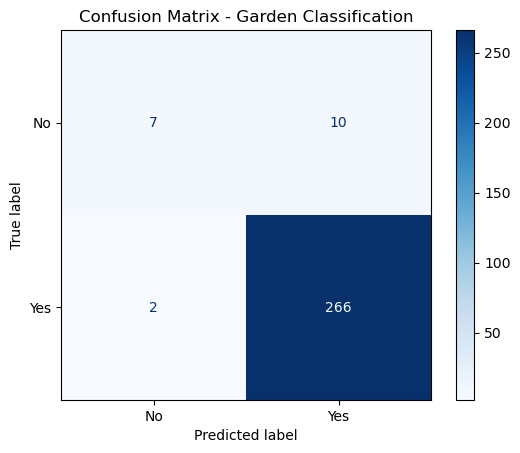

In [44]:
y_pred = model_garden.predict(X_test)

print("-------- Garden Classification report --------")
print(classification_report(y_test,y_pred))

# Condusion Matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=model_garden.classes_)
confusion_matrix_display.plot(cmap="Blues")
plt.title("Confusion Matrix - Garden Classification")
plt.show()

##### Assessment of Classifier

The classifier achieves high accuracy for the majority class (garden = "yes"), correctly identifying almost all properties that have a garden. Despite this, due to the fact the dataset contains mostly "yes" responses, the model struggles to  correctly detect properties without garderns, often predicting "yes" since the model predicts it as a safe guess. 

##### Application and Prediction

Lets now apply our classifier model on the garden column to remove "Unknown" entries.

In [56]:
df_garden_unknown["Garden_Pred"] = model_garden.predict(df_garden_unknown[features])

# Replace "Unknown" with model predictions
df_garden_unknown["Garden"] = df_garden_unknown["Garden_Pred"]
df_garden_unknown = df_garden_unknown.drop(columns=["Garden_Pred"])

##### Re-combine predicted results back into master_df

In [57]:
master_df_updated = pd.concat([df_garden_known, df_garden_unknown], ignore_index=True)
master_df_updated["Garden"].value_counts()

Garden
Yes    1362
No       88
Name: count, dtype: int64

#### 7.4) Garage

Lets do something similar here.

Remember from our our data cleaning section, some entries in the column are "Unknown", in this section lets try to predict whether a property with "Unknown" has or doesn't have a garage based on known features.

Lets now build a different model to predect the value for unknown entries in the Garage column.

##### Splitting

Lets first split the data into two data frames: Known and Unknown Garage Entries.

In [58]:
df_garage_known = master_df[master_df["Garage"] != "Unknown"]
df_garage_unknown = master_df[master_df["Garage"] == "Unknown"]

##### Feature Selection + Preprocessing
Lets define the features we want to use in our model to try and predict the presence or non presence of a garage. Lets also explicity let the model know what we are trying to predict by setting a target.

In [59]:
# Define target and features
features = ["Sale Price", "Location", "Type", "Bedrooms", "Bathrooms", "Stories", "Year Built"]
target = "Garage"

Lets now set our independent and dependent variables. In this case our independent variables will be our set of features denoted by the dataframe x and our dependent variable will be the presence or non presence of a Garage, denoted by the dataframe y.

In [60]:
# Set the x and y dataframes
x = df_garage_known[features]
y = df_garage_known[target]

Lets now tell our model which features are numeric and categorical so that the categorical data can be encoded as binary dummy variables.

In [61]:
# Set categorican and numeric data.
categorical = ["Location","Type"]
numeric = ["Sale Price", "Bedrooms", "Bathrooms", "Stories", "Year Built"]

Now lets preprocess our categorical data into binary dummy variables using the OneHotEncoder and transformers. 

In [62]:
# This reads as: convert categorical data to numeric vectors
# Leave numerical data.
# Save this to variable preprocess
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

##### Train/Test Split Model Training

Before training the classifier lets split the labelled dataset into training and test sets using a 80/20 split and using a fixed random seed to ensure repeatable results.

In [63]:
# Split the data into training and test maintaining Yes/No proportions in the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2,random_state=42, stratify=y
)

# Preprocesses and fits a random forest model.
model_garage = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=300,
                                   class_weight="balanced",
                                   random_state=42))
])

# Applies the model
model_garage.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'Type']),
                                                 ('num', 'passthrough',
                                                  ['Sale Price', 'Bedrooms',
                                                   'Bathrooms', 'Stories',
                                                   'Year Built'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

##### Evaluate Performance

Now that we have ran our model lets now evaluate how correct the predictions are.

-------- Garage Classification report --------
              precision    recall  f1-score   support

          No       0.64      0.49      0.55       109
         Yes       0.71      0.82      0.76       164

    accuracy                           0.68       273
   macro avg       0.67      0.65      0.65       273
weighted avg       0.68      0.68      0.68       273



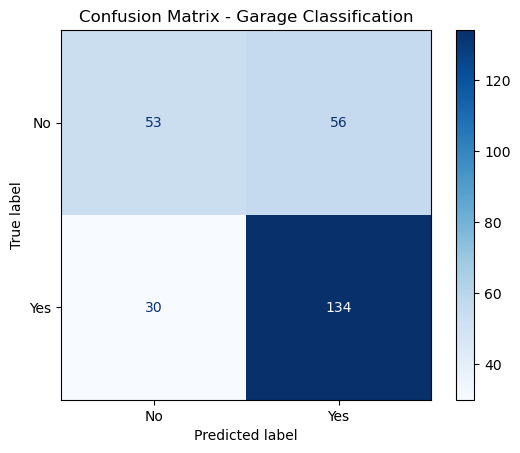

In [64]:
y_pred = model_garage.predict(X_test)

print("-------- Garage Classification report --------")
print(classification_report(y_test,y_pred))

# Condusion Matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=model_garage.classes_)
confusion_matrix_display.plot(cmap="Blues")
plt.title("Confusion Matrix - Garage Classification")
plt.show()

##### Assessment of classifier

The garage classifier while following the exact same steps as the previous garden classifier yields a more balanced performance. This suggests that the presence of a garage is more strongly determined by the presence of other property features making the prediction of no more difficult. 

##### Application and Prediction

Lets now apply our classifier model on the garage column to remove "Unknown" entries.

In [66]:
df_garage_unknown["Garage_Pred"] = model_garage.predict(df_garage_unknown[features])

# Replace "Unknown" with model predictions
df_garage_unknown["Garage"] = df_garage_unknown["Garage_Pred"]
df_garage_unknown = df_garage_unknown.drop(columns=["Garage_Pred"])

##### Re-combine predicted results back into master_df

In [67]:
master_df_updated_2 = pd.concat([df_garage_known, df_garage_unknown], ignore_index=True)
master_df_updated_2["Garage"].value_counts()

Garage
Yes    875
No     575
Name: count, dtype: int64

## Part 3: Discussion

### Challenges

This section will discuss challenges faced while:
 - Web Scraping
 - Data cleaning
 - Dealing with empty values.
 - Training the classifier model.

#### Web Scraping 

The challenge of Web scraping was addressed with the requests and BeautifulSoup Libraries. 

The requests library provides functionality for making HTTP requests. This functionality was used to provide get requests to the property sales webpage urls. Each get request returns either returns the HTML data if successful or a HTTP 200 errror signalling the get request failed.

The BeautifulSoup library was used to pasrse raw HTML data. Since the webpage data is structured as a hierarchy this makes navigating and extracting specific data very difficult. BeautifulSoup addresses this issue by providing functionality to find all specific tags using the *.find_all(tag_type)* function and extracting their *.get_text()* function. This provided this project with a simple functionality to navigate the data and extract the fields that were important to our dataset.

#### Data Cleaning

As mentioned in the lectures, data cleaning and formating took up the most time when completing this project and poses several issues. In this section I will discuss the challanges faced while:

 - Cleaning Date Data
 - Dealing with missing values
 - Cleaning incorectly formatted data.
 - Data Casting

##### Cleaning Date Data

Date data comprised two different formats in the dataset, namely a string format e.g (15 January 2021) and a numerical format e.g (2021-01-15). While both are valid it would be useful to convert these strings to a data type that can be compared with each other. The datetime library provides a datetime object that allows this exact functionality. The *datetime.strptime(date_string, **format**)* method is used in this project to deal with these two date formats and convert them to a *datetime* object so that they can be used in subsequent analysis.

#### Dealing with missing values

The following columns contained missing values and needed to be dealt with:
 - Garden
 - Garage
 - Year Built

##### Gardern

To deal with the missing values in the garden column a basic Random Forest Classifier model was created using the sklearn library.

The classifier achieved high accuracy for the majority class (garden = "yes"), correctly identifying almost all properties that have a garden. Despite this, due to the fact the dataset contains mostly "yes" responses, the model struggles to  correctly detect properties without garderns, often predicting "yes" since the model predicts it as a safe guess. 

These predicted values were then introduced to the dataset.

##### Garage

A similar approach was implemented for dealing with missing values in the Garage column. To deal with the missing values in the garden column a basic Random Forest Classifier model was created using the sklearn library.

The garage classifier while following the exact same steps as the previous garden classifier yielded a more balanced performance. The presence or non presence of a garage was more difficult to predict by the classifier 86 Type I and Type II errors. Since the training dataset was more balanced and didn't favour a "safe" response like that of the Garden model.  

These predicted values were then reintroduced to the dataset.

##### Year Built

A number of missing values were included in the "Year Built" column. To deal with these the median of the "Year Built" column for that year was substituted for the missing Year Built entries.

#### Training the classifier models

The difficulty of dealing with missing values for the Garage and Garden columns was addressed by creating two **supervised classification models** to predict the likely values based on other available property attributes.

The classification problem was approached by using a **Random Forest Classifiers**, chosen due to their ability to handle both numerical and categorical data.

**Model 1 - Garden Classifier:**
- Features used: `Sale Price`, `Location`, `Type`, `Bedrooms`, `Bathrooms`, `Stories`, and `Year Built`.  
- The model achieved very high accuracy due to the strong class imbalance (most properties had gardens).  
- Although precision and recall for the “Yes” class were excellent, the model struggled to correctly identify “No” cases, reflecting the dataset’s imbalance rather a weakness in the model.  
- This result is realistic, as the majority of properties in the dataset do in fact include gardens.

**Model 2 - Garage Classifier:**
- The same input features were used to predict whether a property had a garage.  
- Unlike the garden data, the garage column showed a more even distribution between Yes and No.  
- The classifier achieved balanced performance with approximately **68% overall accuracy** and comparable precision and recall scores across both classes.  
- This indicates that garage presence is more strongly determined by measurable factors such as property type, location, and sale price.

**Interpretation:**
These models show how missing categorical data (which is a major challenge in data analytics), can be addressed using machine learning as opposed to replacing missing entries with arbitrary data. 

While the garden model was limited by data imbalance, the garage model demonstrates a more meaningful predicticve capability, highlighting the importance of balanced datasets when training classification models.

### Key Insights
This section will discuss the insights gained from the analysis on the dataset. The following insights will be discussed:
1) Sale Price Trends Across Years
2) Location Price Trends Over Time
3) Mean Sale price per Location
4) Property Type Market shift
5) Number of Sales Per Month
6) Do bedrooms have a relationship with price?
7) Do Bathrooms have a relationship with price?

#### Sale Price Trends Across Years

Average sale price of the properties in the dataset fluctuate between just above "€425,000" and just below "€455,000", with 2024 having the lowest mean Sale Price and 2023 having the largest.

#### Location Price Trends Over Time

No Locations are suffering from a noticable drop in market value over time, however Avoca experienced an increase in mean Sale Price from just below €600,000 in 2021 to almost €650,000 just two years later in 2023 before eventually returning back to €600,000.

Furthermore, a clear seperation in market values between locations are visable here with:
 - Avoca and Porter Square typically falling in the €575,000 to €650,000 price range. 
 - Brookville falling in the €500,000 age range.
 - Summerston, Rivermount, Beacon Hill, Broomhouse, and Oak Park falling in the €300,000 to €375,000 range. 

#### Property Type Market shift

Trends stay constant throughout the years with the following characteristics:
 - Bungalows being the cheapest property type and costing roughly €225,000
 - Terraced houses are the second cheapest property types with the exception of 2024 where they are slightly more expensive than duplex properties. Terraced houses range from €250,000 to €325,000.
 - Duplex properties are the third cheapest property types (with the exception of 2024 as mentioned above), and range from €275,000 to €350,000
 - Semi-Detached properties are the 4th cheapest with the exception of 2024 where they are actually the most expensive (this was investigated and attributed to an increased number of Semi-Detached properties being sold in expensive locations in 2024) and typically range from 425,000 to 450,000. 
 - Detached and End-Of_Terrace fluctuate between most and second most expensive property type, with 2024 being an exception. These two property types have a price range of €425,000 and €500,000

#### Number of Sales Per Month

There is a clear trend in this data, property sales remain quiet for the winter, spring, and autumn with a huge spike in the number of sales in May, June, and July across all 4 years.

Furthermore, 2024 saw a large rise (+100) in the number of sales compared to the three previous years.

#### Do bedrooms have a relationship with price?

Although you might think there would be a positive relationship between number of bedrooms and price, that doesn't seem to be the case in the data. Other features such as `location`, `First Time Owner`, or `Type` might have more effect on the Sale Price than the number of bedrooms.

#### Do Bathrooms have a relationship with price?

There is a clearer relationship between `Bathrooms` and `Sale Price` compared to the `Bedrooms`. One bathroom properties tend to be the cheapest of the three property types, while 2 bathroom properties span a broader price range and contain the most expensive properties. Three bathroom properties also tend to sell at higher prices, but the smaller sample size introduces uncertainty. This suggests that number of bathrooms is a useful predictor of price as it could reflect more general property characteristics (e.g more bathroom -> larger property -> more expenisive area...).

### Future Work
 
While the dataset provided a solid foundation for exploratory analysis and predictive modelling, several improvements could enhance the overall quality and depth of future work.  

Collecting additional data points such as **property floor area, lot size, energy efficiency ratings, and distance to amenities** would allow for richer and more precise analysis of price drivers.   

Future iterations could also apply **geospatial analysis**, integrating map-based visualisations to examine how location and neighbourhood characteristics influence property values.  

Finally, the integration of predictive models for **price estimation** or **market segmentation** could extend the project from descriptive analytics toward more advanced, decision-support applications.
